<hr>
<a id='top'></a> 
###  Table of Contents

## <a href='#data_wrangling'>2. Data Cleaning</a>

### <a href='#dataset'>2.1. Dataset</a>

#### <a href='#drop'>2.3.1. Dropping Null Values</a>

#### <a href='#change'>2.3.2. Changing Column Names , Data Types, Date/Time Conversions</a>



## <a href='#eda'>3. Exploratory Data Analysis</a>

### <a href='#means'>3.1. Means and Standard Deviations</a>

### <a href='#dis1'>3.2. Distributions: Liked vs. Disliked Songs</a>

### <a href='#dis2'>3.3. Distributions: Liked vs. Today's Top Hits Songs</a>



## <a href='#machine_learning'>4. Machine Learning</a>

### <a href='#pre'>4.1. Data Preprocessing</a>

### <a href='#imb'>4.2. Model the Data - Imbalanced Data</a>

### <a href='#model1'>4.3. Model the Data - Resampled Data</a>

### <a href='#hype'>4.4. Hypertuning Parameters - Random Forest</a>




<hr>
## <a id='data_wrangling'>2. Data Cleaning</a> 

In [14]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


### <a id='dataset'>2.1. Dataset</a> 

In [6]:
# GET THE DATA
liked = pd.read_excel('Data/LIKES.xlsx')
disliked = pd.read_excel('Data/DISLIKES.xlsx')
tophits = pd.read_excel('Data/TOP_HITS.xlsx')

#### Inspecting the Data

In [7]:
liked.head()

,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,Where Is My Mind?,Pixies,2004-05-03 00:00:00,81.0,44.0,51.0,-14.0,24.0,03:49:00,1.0,35.0
1,Men's Needs,The Cribs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I Never,Rilo Kiley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Maps,Yeah Yeah Yeahs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hold You,Gyptian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
liked.describe()

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,117.832258,55.961290,63.837097,-7.811290,39.179032,28.493548,58.164516
std,28.322587,19.078745,14.554035,3.001594,22.441564,27.848569,18.191017
min,52.000000,6.000000,21.000000,-25.000000,3.000000,0.000000,0.000000
25%,96.000000,41.000000,54.000000,-9.000000,21.000000,5.000000,48.000000
50%,118.500000,55.500000,65.000000,-7.000000,36.000000,18.000000,62.000000
75%,137.000000,69.000000,74.000000,-6.000000,55.000000,48.000000,70.250000
max,204.000000,99.000000,95.000000,-2.000000,97.000000,96.000000,96.000000


In [9]:
liked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 11 columns):
TITLE       630 non-null object
ARTIST      629 non-null object
RELEASE     620 non-null object
BPM         620 non-null float64
ENERGY      620 non-null float64
DANCE       620 non-null float64
LOUD        620 non-null float64
VALENCE     620 non-null float64
LENGTH      620 non-null object
ACOUSTIC    620 non-null float64
POP.        620 non-null float64
dtypes: float64(7), object(4)
memory usage: 54.2+ KB


#### <a id='drop'>2.3.1. Dropping Null Values</a> 

In [10]:
liked = liked.dropna().reset_index(drop=True)
disliked = disliked.dropna().reset_index(drop=True)
tophits = tophits.dropna().reset_index(drop=True)

#### <a id='change'>2.3.2. Changing Column Names , Data Types, Date/Time Conversions</a> 

In [11]:
# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
liked = liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
disliked = disliked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
tophits = tophits.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
liked['YEAR'] = liked['RELEASE'].astype(str).str[0:4]
liked['YEAR'] = liked['YEAR'].convert_objects(convert_numeric=True)

disliked['YEAR'] = disliked['RELEASE'].astype(str).str[0:4]
disliked['YEAR'] = disliked['YEAR'].convert_objects(convert_numeric=True)

tophits['YEAR'] = tophits['RELEASE'].astype(str).str[0:4]
tophits['YEAR'] = tophits['YEAR'].convert_objects(convert_numeric=True)

# OBJECT TYPE INTO NUMERIC TYPE IN 'LENGTH' COLUMN 
liked['MINUTES'] = liked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
liked['SECONDS'] = liked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

disliked['MINUTES'] = disliked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
disliked['SECONDS'] = disliked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

tophits['MINUTES'] = tophits['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
tophits['SECONDS'] = tophits['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

# CONVERT MINUTES TO SECONDS & ADD 'DURATION' COLUMN, DROP 'LENGTH', 'MINUTES', 'SECONDS', AND 'RELEASE' COLUMNS
liked['DURATION'] = liked['MINUTES'] * 60 + liked['SECONDS']
liked = liked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

disliked['DURATION'] = disliked['MINUTES'] * 60 + disliked['SECONDS']
disliked = disliked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

tophits['DURATION'] = tophits['MINUTES'] * 60 + tophits['SECONDS']
tophits = tophits.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)


C:\Users\orenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\orenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\orenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\orenz\Anaconda3\lib\si

<hr>
## <a id='eda'>3. EDA and Data Storytelling</a> 

### <a id='means'>3.1. Means and Standard Deviations</a> 

In [12]:
# GET DESCRIBE VALUES
d1 = liked.describe()
d2 = disliked.describe()
d3 = tophits.describe()

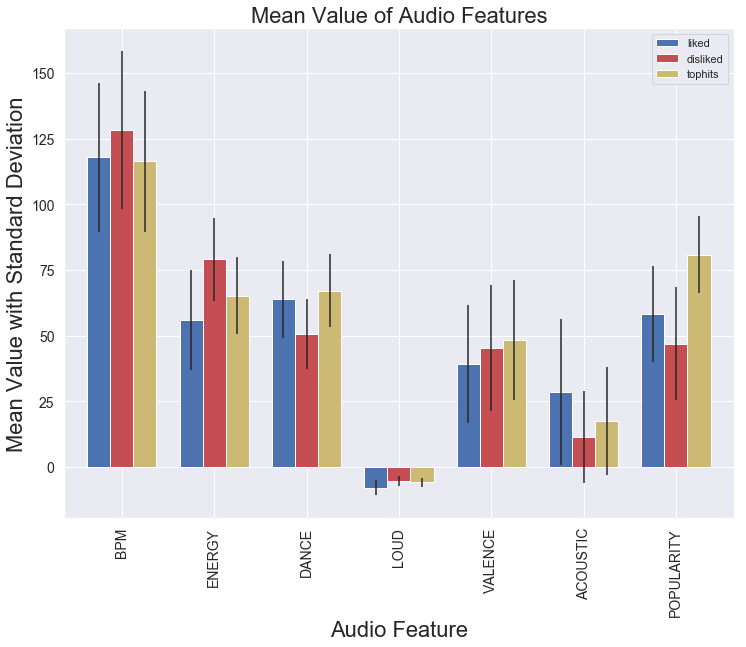

In [15]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# GROUPED BAR PLOTS
avgs = pd.concat([d1.iloc[1,:7].rename('liked'), 
                  d2.iloc[1,:7].rename('disliked'), 
                  d3.iloc[1,:7].rename('tophits')], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[d1.iloc[2,:7], 
                                                                       d2.iloc[2,:7], 
                                                                       d3.iloc[2,:7]],
                                                                 color=['b','r','y'])

# SET TITLE AND LABELS 
avgs.set_title('Mean Value of Audio Features', fontsize=22)
avgs.set_xlabel('Audio Feature', fontsize=22)
avgs.set_ylabel('Mean Value with Standard Deviation', fontsize=22)

plt.show()

### <a id='dis1'>3.2. Distributions: Liked vs. Disliked Songs</a> 

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


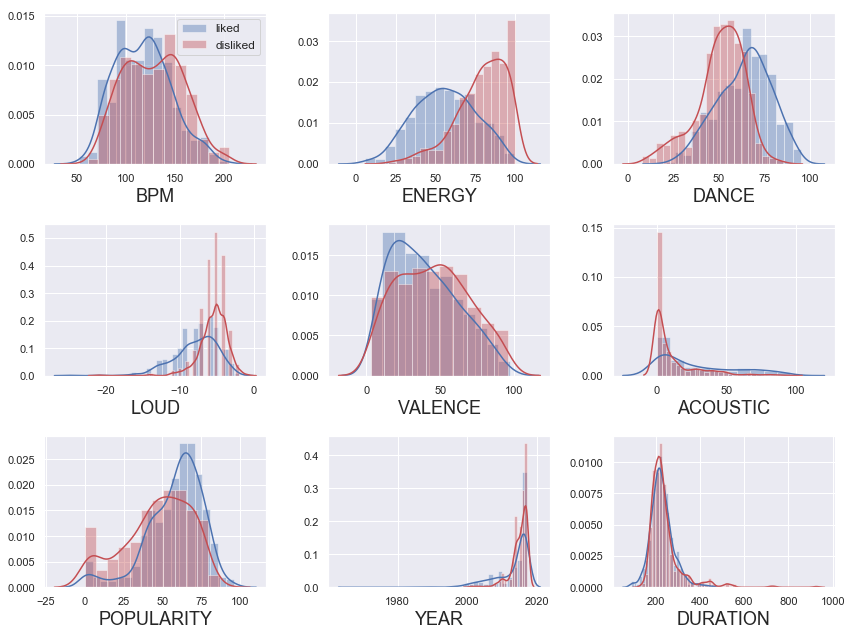

In [16]:
# DISTRIBUTIONS
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(disliked.BPM, color='r', label='disliked')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(disliked.ENERGY, color='r')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(disliked.DANCE, color='r')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(disliked.LOUD, color='r')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(disliked.VALENCE, color='r')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(disliked.ACOUSTIC, color='r')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(disliked.POPULARITY, color='r')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(disliked.YEAR, color='r')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(disliked.DURATION, color='r')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


#### Finding Outliers: Liked & Disliked

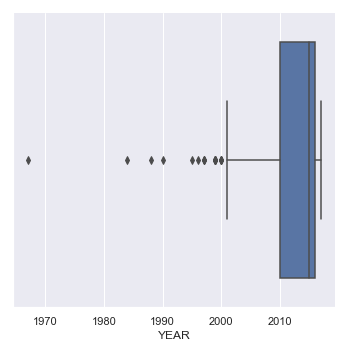

In [18]:
# FINDING OUTLIERS - LIKED
sns.catplot(x='YEAR', data=liked, kind='box')
plt.show()

In [19]:
# FINDING OUTLIERS - LIKED
liked[liked.YEAR < 1980]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
85,Sunday Morning,The Velvet Underground,106.0,48.0,50.0,-12.0,51.0,8.0,4.0,1967,174


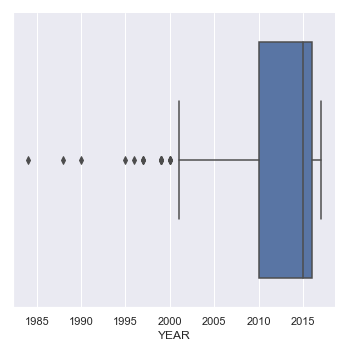

In [20]:
# REMOVING OUTLIERS - LIKED
liked = liked[liked.YEAR > 1980]
sns.catplot(x='YEAR', data=liked, kind='box')
plt.show()

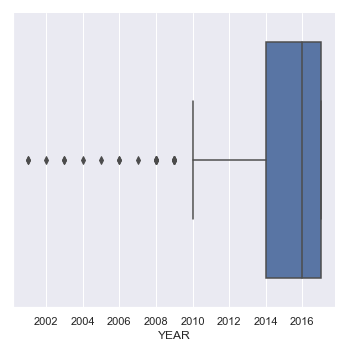

In [21]:
# FINDING OUTLIERS - DISLIKED
sns.catplot(x='YEAR', data=disliked, kind='box')
plt.show()

In [22]:
disliked[disliked['YEAR'] < 2005]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
1,Somewhere Down in Texas,Jason Boland,72.0,49.0,48.0,-11.0,50.0,14.0,5.0,2001,352
65,Days Go By,Keith Urban,132.0,89.0,59.0,-3.0,75.0,6.0,48.0,2004,225
74,What Was I Thinkin',Dierks Bentley,165.0,83.0,55.0,-6.0,93.0,15.0,65.0,2003,261
212,Alright Guy - Album Version (Remix),Gary Allan,121.0,77.0,67.0,-6.0,65.0,6.0,37.0,2001,262
226,Chicks Dig It,Chris Cagle,104.0,92.0,60.0,-5.0,70.0,2.0,60.0,2003,211
229,"Courtesy Of The Red, White And Blue (The Angry...",Toby Keith,110.0,67.0,42.0,-6.0,35.0,52.0,48.0,2002,196


### <a id='dis2'>3.3. Distributions: Liked vs. Today's Top Hits Songs</a> 

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


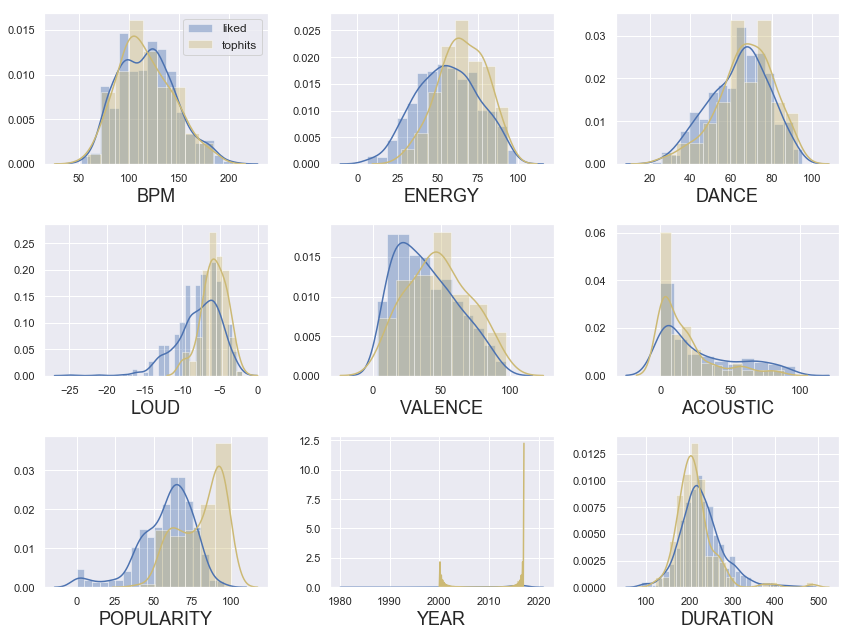

In [23]:
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(tophits.BPM, color='y', label='tophits')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(tophits.ENERGY, color='y')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(tophits.DANCE, color='y')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(tophits.LOUD, color='y')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(tophits.VALENCE, color='y')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(tophits.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(tophits.POPULARITY, color='y')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(tophits.YEAR, color='y')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(tophits.DURATION, color='y')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


#### Finding & Removing Outliers

C:\Users\orenz\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


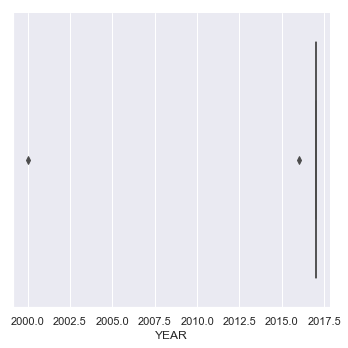

In [24]:
# FINDING OUTLIERS - TOP HITS
sns.factorplot(x='YEAR', data=tophits, kind='box')
plt.show()

In [25]:
# FINDING OUTLIERS - TOP HITS
tophits[tophits['YEAR'] < 2002]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
113,For the Damaged Coda,Blonde Redhead,141.0,47.0,50.0,-10.0,8.0,80.0,71.0,2000,157


C:\Users\orenz\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


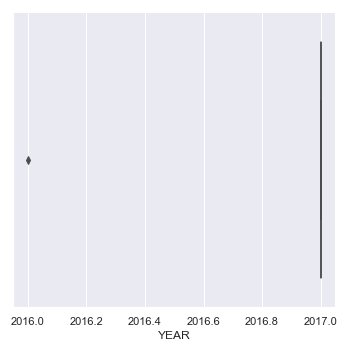

In [26]:
# REMOVING OUTLIERS - TOP HITS
tophits = tophits[tophits.YEAR > 2002]
sns.factorplot(x='YEAR', data=tophits, kind='box')
plt.show()

<hr>
## <a id='machine_learning'>4. Machine Learning</a>

### <a id='pre'>4.1. Data Preprocessing</a>

In [27]:
# IMPORT PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, matthews_corrcoef, log_loss,
                             mean_squared_error, auc)
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# ADD TARGET COLUMN, 1 FOR LIKED SONGS, 0 FOR DISLIKED SONGS
liked['TARGET'] = 1
disliked['TARGET'] = 0

# COMBINE LIKED and DISLIKED PLAYLIST
combined = pd.concat([liked,disliked], ignore_index=True)

C:\Users\orenz\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
print('Liked Count:', len(liked))
print('Disliked Count:', len(disliked))

Liked Count: 619
Disliked Count: 529


### <a id='imb'>4.2. Model the Data - Imbalanced Data</a>

#### Imbalanced Data

In [27]:
X = combined[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
y = combined['TARGET']

In [28]:
# TRAINING / TESTING DATA
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X, y, random_state=42)
print('Features Training Set:', X_train_im.shape, 'Features Testing Set:', X_test_im.shape)
print('Target Training Set:', y_train_im.shape, 'Target Testing Set:', y_test_im.shape)

Features Training Set: (861, 7) Features Testing Set: (287, 7)
Target Training Set: (861,) Target Testing Set: (287,)


#### Balanced Data - Resample 

In [29]:
# SEPARATE MAJORITY AND MINORITY CLASSES
df_majority = combined[combined.TARGET==1]
df_minority = combined[combined.TARGET==0]
 
# UPSAMPLE MINORITY CLASS
df_minority_up = resample(df_minority, 
                          replace=True,     # sample with replacement
                          n_samples=619,    # to match majority class
                          random_state=12)  # reproducible results

# COMBINED MAJORITY CLASS WITH UPSAMPLED MINORITY CLASS
df_upsampled = pd.concat([df_majority, df_minority_up])
 
# UPSAMPLED CLASS COUNTS
print(df_upsampled.TARGET.value_counts())

# FEATURES & TARGET VARIABLE
X_res = df_upsampled[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
y_res = df_upsampled['TARGET']

1    619
0    619
Name: TARGET, dtype: int64


In [30]:
# TRAINING / TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=42)
print('Features Training Set:', X_train.shape, 'Features Testing Set:', X_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (928, 7) Features Testing Set: (310, 7)
Target Training Set: (928,) Target Testing Set: (310,)


#### Balanced Data - SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio='auto', kind='regular')
X_smote , y_smote = sm.fit_sample(X,y)

print('SMOTE Features Set:', X_smote.shape)
print('SMOTE Training Set:', y_smote.shape)

SMOTE Features Set: (1238, 7)
SMOTE Training Set: (1238,)


In [32]:
# TRAINING / TESTING DATA
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, random_state=42)
print('Features Training Set:', X_train_sm.shape, 'Features Testing Set:', X_test_sm.shape)
print('Target Training Set:', y_train_sm.shape, 'Target Testing Set:', y_test_sm.shape)

Features Training Set: (928, 7) Features Testing Set: (310, 7)
Target Training Set: (928,) Target Testing Set: (310,)


#### ROC SCORES FOR ALL MODELS

In [114]:
##################### IMBALANCED DATA

# KNN CLASSIFIER
knn = KNeighborsClassifier()
knn.fit(X_train_im, y_train_im)
y_pred_knn_im = knn.predict(X_test_im)
y_pred_prob_knn_im = knn.predict_proba(X_test_im)[:,1]
knn_im_roc = roc_auc_score(y_test_im, y_pred_prob_knn_im)

# LOGISTIC REGRESSION 
logreg = LogisticRegression()
logreg.fit(X_train_im, y_train_im)
y_pred_logreg_im = logreg.predict(X_test_im)
y_pred_prob_logreg_im = logreg.predict_proba(X_test_im)[:,1]
logreg_im_roc = roc_auc_score(y_test_im, y_pred_prob_logreg_im)

# RANDOM FOREST 
rf = RandomForestClassifier()
rf.fit(X_train_im, y_train_im)
y_pred_rf_im = rf.predict(X_test_im)
y_pred_prob_rf_im = rf.predict_proba(X_test_im)[:,1]
rf_im_roc = roc_auc_score(y_test_im, y_pred_prob_rf_im)

##################### BALANCED DATA - RESAMPLED 

# KNN CLASSIFIER
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
knn_roc = roc_auc_score(y_test, y_pred_prob_knn)

# LOGISTIC REGRESSION 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1]
logreg_roc = roc_auc_score(y_test, y_pred_prob_logreg)

# RANDOM FOREST 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
rf_roc = roc_auc_score(y_test, y_pred_prob_rf)

##################### BALANCED DATA - SMOTE

# KNN CLASSIFIER
knn = KNeighborsClassifier()
knn.fit(X_train_sm, y_train_sm)
y_pred_knn_sm = knn.predict(X_test_sm)
y_pred_prob_knn_sm = knn.predict_proba(X_test_sm)[:,1]
knn_sm_roc = roc_auc_score(y_test_sm, y_pred_prob_knn_sm)

# LOGISTIC REGRESSION 
logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train_sm)
y_pred_logreg_sm = logreg.predict(X_test_sm)
y_pred_prob_logreg_sm = logreg.predict_proba(X_test_sm)[:,1]
logreg_sm_roc = roc_auc_score(y_test_sm, y_pred_prob_logreg_sm)

# RANDOM FOREST 
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf.predict(X_test_sm)
y_pred_prob_rf_sm = rf.predict_proba(X_test_sm)[:,1]
rf_sm_roc = roc_auc_score(y_test_sm, y_pred_prob_rf_sm)

roc = [('k-NN', '{:.2%}'.format(knn_im_roc), 
        '{:.2%}'.format(knn_roc), '{:.2%}'.format(knn_sm_roc)),
         ('Logistic Regression', '{:.2%}'.format(logreg_im_roc), 
          '{:.2%}'.format(logreg_roc), '{:.2%}'.format(logreg_sm_roc)),
         ('Random Forest', '{:.2%}'.format(rf_im_roc), 
          '{:.2%}'.format(rf_roc), '{:.2%}'.format(rf_sm_roc))]

labels = ['Classifier', 'Imbalanced', 'Resampled', 'SMOTE']
df = pd.DataFrame.from_records(roc, columns=labels)
df

,Classifier,Imbalanced,Resampled,SMOTE
0,k-NN,85.43%,88.79%,86.90%
1,Logistic Regression,87.18%,89.90%,89.87%
2,Random Forest,85.07%,92.46%,91.44%


### <a id='model1'>4.3. Model the Data: Resampled Data</a>

                    ROC AUC Accuracy Precision  Recall
Classifier                                            
k-Nearest Neighbor   88.79%   80.00%    86.52%  73.94%
Logistic Regression  89.90%   81.61%    83.75%  81.21%
Random Forest        91.94%   83.87%    85.71%  83.64%


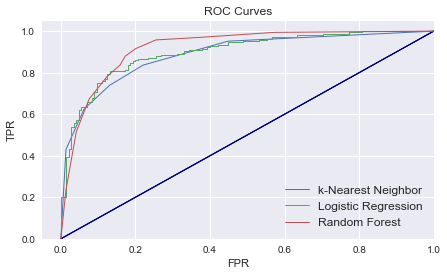

In [104]:
classifiers = [KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier()]
class_label = ['k-Nearest Neighbor','Logistic Regression','Random Forest']
columns = ['Classifier','ROC AUC','Accuracy','Precision','Recall']

clf_df = pd.DataFrame(index=[0],columns=columns)
fig = plt.figure(figsize=(12,4))

for clf in classifiers:
    
    # FIT CLASSIFIER
    clf.fit(X_train,y_train)
    
    # PREDICT ON TEST SET
    y_pred = clf.predict(X_test)
    
    # ACCURACY SCORE
    acc = accuracy_score(y_test, y_pred)
    
    # PROBABILITIES
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    
    # ROC SCORES 
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
    rocauc = roc_auc_score(y_test,y_pred_prob)
    
    # ROC CURVES
    ax1= plt.subplot(121)
    plt.plot([0,1], [0,1], color='navy', lw=1)
    plt.plot(fpr, tpr, lw=1, label=class_label[classifiers.index(clf)])
    plt.xlim([-.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curves')
    plt.legend(loc='best',fontsize=12)
    
    # PRECISION & RECALL 
    prscore = precision_score(y_test,clf.predict(X_test))
    recscore = recall_score(y_test,clf.predict(X_test))
    
    # ADD SCORES TO DF
    clf_df.loc[classifiers.index(clf)] = [class_label[classifiers.index(clf)],
                                          '{:.2%}'.format(rocauc),
                                          '{:.2%}'.format(acc),'{:.2%}'.format(prscore),
                                          '{:.2%}'.format(recscore)]

plt.tight_layout()
clf_df = clf_df.set_index('Classifier')
print(clf_df)
plt.show()

### <a id='hype'>4.4. Hypertuning Parameters - Random Forest</a>

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10,200,10),
              'min_samples_leaf': np.arange(1,100,10),
              'max_features': ['auto', 'sqrt', 'log2']}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
print(rf_cv.best_score_)

ne=rf_cv.best_params_['n_estimators']
msl=rf_cv.best_params_['min_samples_leaf']
mf=rf_cv.best_params_['max_features']

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 80}
0.869612068966


In [106]:
# Create the classifier
rf = RandomForestClassifier(n_estimators=ne,
                            min_samples_leaf=msl,
                            max_features=mf)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# PREDICTION PROBABILITIES
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

In [107]:
print('ROC AUC Score:','{:.2%}'.format(roc_auc_score(y_test, y_pred_prob_rf)))
print('Test Accuracy:', '{:.2%}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision:','{:.2%}'.format(precision_score(y_test, y_pred_rf)))
print('Recall:', '{:.2%}'.format(recall_score(y_test, y_pred_rf)))

#print('Recall:', recall_score(y_test,rf.predict(X_test))

print('\n Clasification Report:\n', classification_report(y_test, y_pred_rf))
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

ROC AUC Score: 93.38%
Test Accuracy: 85.16%
Precision: 86.06%
Recall: 86.06%

 Clasification Report:
              precision    recall  f1-score   support

          0       0.84      0.84      0.84       145
          1       0.86      0.86      0.86       165

avg / total       0.85      0.85      0.85       310


 Confusion Matrix:
 [[122  23]
 [ 23 142]]


## <a href='#top'>^ Back to Top ^</a>